<a href="https://colab.research.google.com/github/s1063724/2024python_analysis/blob/main/example/0112dataview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 第十集
# 大數據(Big Data)分析 - 資料視覺化 (data visualization)
# 模式(pattern),趨勢(trend),關聯性(relation)-差異(differ)
# 資料視覺化三個要素:1.資料正確性 2.閱讀者的需求 3.傳遞有效的資訊(80:20法則)
# 資料視覺化的進行方法:1. 問問題(分佈、趨勢、關聯、排序) 2.選擇或蒐集資料(原始資料raw data , 政府公開資料, 買來的, 網路爬蟲)
# 3.找出模式(學習) 4.設定要呈現的優先順序 5.呈現報告結果

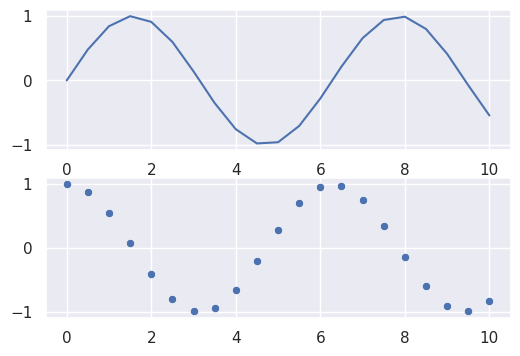

In [ ]:
# seaborn
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

x = [0, 0.5, 5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5,
     6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]
sinus = [math.sin(v) for v in x]
cosinus = [math.cos(v) for v in x]
# 設定sns為繪圖模板
sns.set()
# fig(圖片), axes(軸) subplot(1, 2)產生兩個平行排列的子圖
fig, axes = plt.subplots(2, 1, figsize =(6,4))
ax1 = sns.lineplot(x=x, y=sinus, ax = axes[0])
ax2 = sns.scatterplot(x=x, y = cosinus , ax = axes[1])
plt.show()

     x       sin       cos
0  0.0  0.000000  1.000000
1  0.5  0.479426  0.877583
2  5.0 -0.958924  0.283662
3  1.0  0.841471  0.540302
4  1.5  0.997495  0.070737
       x variable     value
0    0.0      sin  0.000000
1    0.5      sin  0.479426
2    5.0      sin -0.958924
3    1.0      sin  0.841471
4    1.5      sin  0.997495
5    2.0      sin  0.909297
6    2.5      sin  0.598472
7    3.0      sin  0.141120
8    3.5      sin -0.350783
9    4.0      sin -0.756802
10   4.5      sin -0.977530
11   5.0      sin -0.958924
12   5.5      sin -0.705540
13   6.0      sin -0.279415
14   6.5      sin  0.215120
15   7.0      sin  0.656987
16   7.5      sin  0.938000
17   8.0      sin  0.989358
18   8.5      sin  0.798487
19   9.0      sin  0.412118
20   9.5      sin -0.075151
21  10.0      sin -0.544021
22   0.0      cos  1.000000
23   0.5      cos  0.877583
24   5.0      cos  0.283662
25   1.0      cos  0.540302
26   1.5      cos  0.070737
27   2.0      cos -0.416147
28   2.5      cos -0.80114

<Figure size 640x480 with 0 Axes>

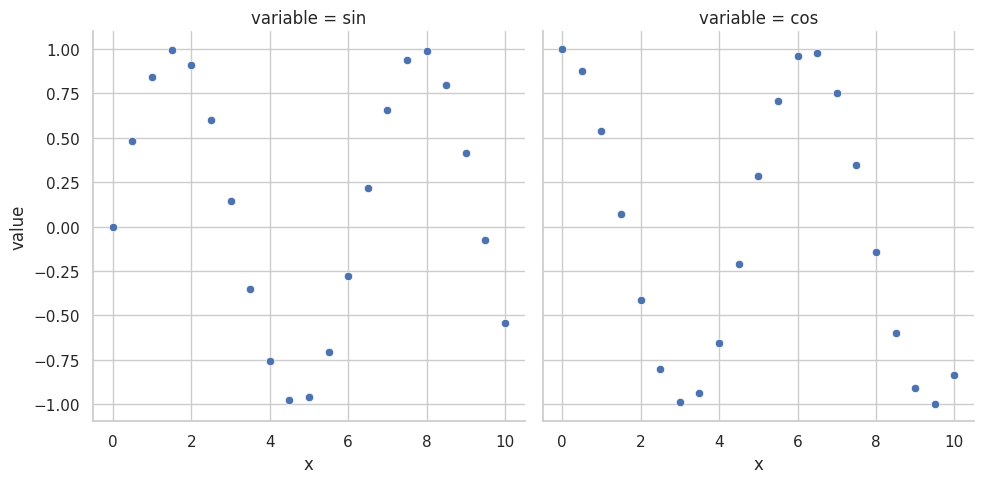

In [ ]:
df = pd.DataFrame()
df['x'] = x
df['sin'] = sinus
df['cos'] = cosinus
print(df.head())
# melt溶解
df2 = pd.melt(df, id_vars=['x'], value_vars=['sin', 'cos'])
print(df2)
sns.set()
sns.set_style('whitegrid')# 樣式一(白色網格)
sns.despine() # 刪除上面的軸線，spine中軸線
sns.relplot(x = 'x', y = 'value', kind = 'scatter', col = 'variable', data = df2)
plt.show()

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
# 給小費習慣(範例資料)
df = sns.load_dataset('tips')
print(df.head())




   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


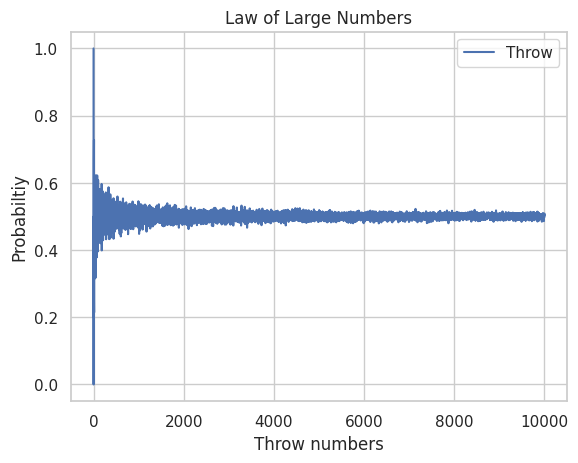

In [ ]:
# 大數法則 (The Law of Large Numbers): 當數字夠大, 測試的資料, 就相當於實際的資料
import numpy as np
results = []
for num_throws in range(1, 10001):
  # 反面用0表示,正面用2表示
  throws = np.random.randint(low=0, high=2, size=num_throws)
  probabiltiy_of_throws = throws.sum()/num_throws
  results.append(probabiltiy_of_throws)

df = pd.DataFrame({'Throw':results})
df.plot(color='b')
plt.title("Law of Large Numbers")
# 投擲次數
plt.xlabel('Throw numbers')
# 平均機率
plt.ylabel('Probabiltiy')
plt.show()

In [ ]:
# from sklearn.datasets import load_boston
# boston = load_boston()

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]



In [ ]:
#綜合練習實際案例, 結合資料處理+資料視覺化
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.keys())
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#檢視資料的訊息, 查看是否有遺漏值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


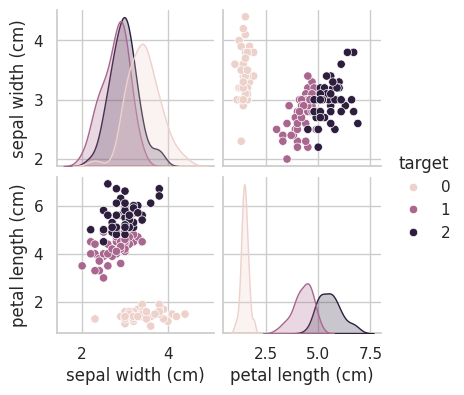

In [ ]:
# 配對圖 hue:樣式目標, vars:比較變數
sns.pairplot(df, hue='target', vars=['sepal width (cm)', 'petal length (cm)'], size=2)

In [ ]:
# corr相關係數、小數點第二位
df.corr().round(2)['target']

sepal length (cm)    0.78
sepal width (cm)    -0.43
petal length (cm)    0.95
petal width (cm)     0.96
target               1.00
Name: target, dtype: float64

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

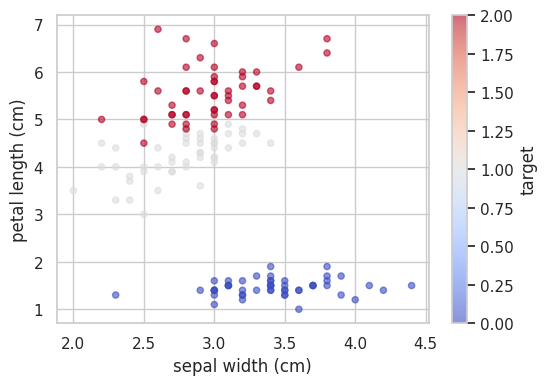

In [ ]:
# alpha透視度
df.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', c='target', cmap='coolwarm', alpha=0.6, figsize=(6,4))


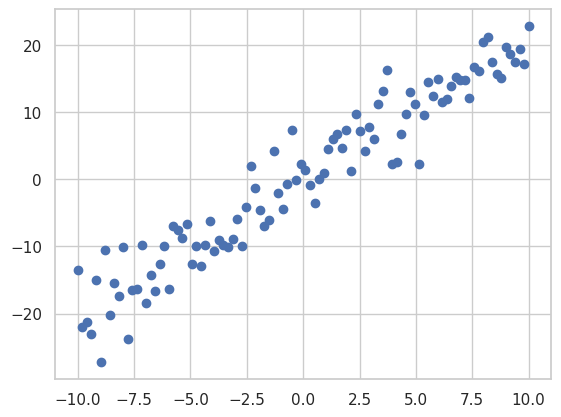

In [ ]:
# 主成分分析 (PCA, princial component analysis)
np.random.seed(1)
x = np.linspace(-10, 10, 100)
y = 2 * x + 4*np.random.randn(100)
df_pca = pd.DataFrame(zip(x, y), columns=['x0', 'x1'])
plt.scatter(x, y)

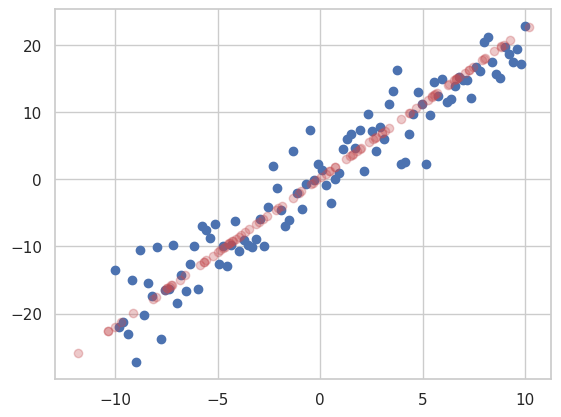

In [ ]:
# 主成分分析
from sklearn.decomposition import PCA
# n_components幾個維度(幾個種類)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(df_pca)
# print(X_pca)
plt.scatter(x, y) #畫出原來資料的分佈散點圖
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:,0], X_new[:,1], c='r', alpha=0.3);

In [ ]:
# 鐵達尼號資料
# https://gist.github.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380
df = pd.read_csv('titanic.csv')
df.head(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#檢視資料的分佈
# 將資料黏起來
pd.concat([df['Survived'].value_counts(), df['Survived'].value_counts(normalize=True)], axis=1, keys=['個數', '百分比'])

,個數,百分比
0,549,0.616162
1,342,0.383838
